In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [195]:
df = pd.read_csv('../src/data/swiggy.csv')
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [196]:
df.shape

(45593, 20)

In [197]:
# data types
(
    df
    .dtypes
 )

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                 object
dtype: object

**Observations**:

some columns do not have proper data types.

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [199]:
df.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

**Observation**
- it seems there is no null values.

In [200]:
df.isna().sum().sum()

np.int64(0)

In [201]:
df.sample(50)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
1372,0x99a9,BANGRES17DEL02,33,4.5,12.972532,77.608179,13.022532,77.658179,15-03-2022,21:00:00,21:15:00,conditions Sunny,Jam,2,Snack,electric_scooter,0,No,Metropolitian,(min) 22
12169,0x689d,RANCHIRES01DEL01,30,4.6,23.416792,85.316842,23.456792,85.356842,09-03-2022,14:00:00,14:15:00,conditions Cloudy,High,1,Meal,scooter,0,No,Urban,(min) 38
33525,0xb05b,RANCHIRES15DEL03,26,4.6,23.369746,85.339820,23.399746,85.369820,19-03-2022,18:40:00,18:45:00,conditions Sunny,Medium,2,Snack,electric_scooter,0,No,Urban,(min) 14
15201,0x5db7,CHENRES02DEL01,35,4.6,13.086438,80.220672,13.096438,80.230672,09-03-2022,11:30:00,11:35:00,conditions Windy,High,1,Meal,scooter,0,No,Metropolitian,(min) 27
30840,0x449a,HYDRES06DEL01,26,4.3,17.455894,78.375467,17.465894,78.385467,03-03-2022,09:00:00,09:15:00,conditions Windy,Low,0,Buffet,motorcycle,1,No,Metropolitian,(min) 26
25363,0x4f74,INDORES20DEL02,37,4.8,22.732225,75.874765,22.782225,75.924765,07-03-2022,23:10:00,23:15:00,conditions Sunny,Low,0,Drinks,motorcycle,0,No,Metropolitian,(min) 25
3896,0x9b09,MYSRES06DEL03,27,4.9,12.323994,76.626167,12.353994,76.656167,15-03-2022,23:45:00,23:50:00,conditions Stormy,Low,1,Snack,motorcycle,NaN,No,Metropolitian,(min) 13
20773,0x503e,CHENRES16DEL02,23,4.8,13.049645,80.242268,13.069645,80.262268,28-03-2022,11:00:00,11:10:00,conditions Cloudy,Low,2,Drinks,scooter,0,No,Urban,(min) 15
6378,0xaf45,VADRES02DEL02,27,4.5,0.000000,0.000000,0.050000,0.050000,15-03-2022,20:55:00,21:00:00,conditions Fog,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 30
25194,0x4231,MUMRES17DEL03,24,4.7,19.121999,72.908493,19.151999,72.938493,01-04-2022,18:55:00,19:10:00,conditions Windy,Medium,0,Drinks,motorcycle,1,No,Metropolitian,(min) 27


**Observation** -
there are null values in dataset but these are in string form.

In [202]:
df.loc[30487,'Delivery_person_Age']

'NaN '

In [203]:
(df=='NaN ').sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [204]:
(
    df
    .loc[:, 'Weatherconditions']
    .str.replace('conditions ', '')
    .replace('NaN', np.nan)
    .isna()
    .sum()
)

np.int64(616)

In [205]:
(
    (df=='NaN ')
    .sum()
)

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [206]:
# seperate df which contains null values
missing_df = (
    df
    .replace("NaN ", np.nan)
    .assign(
        Weatherconditions = lambda x: (
            x['Weatherconditions']
            .str.replace('conditions ', '')
            .replace('NaN', np.nan)
        )
    )
)

missing_df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [207]:
missing_df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [208]:
missing_df.isna().sum().sum()

np.int64(9131)

### Missing values analysis

<Axes: >

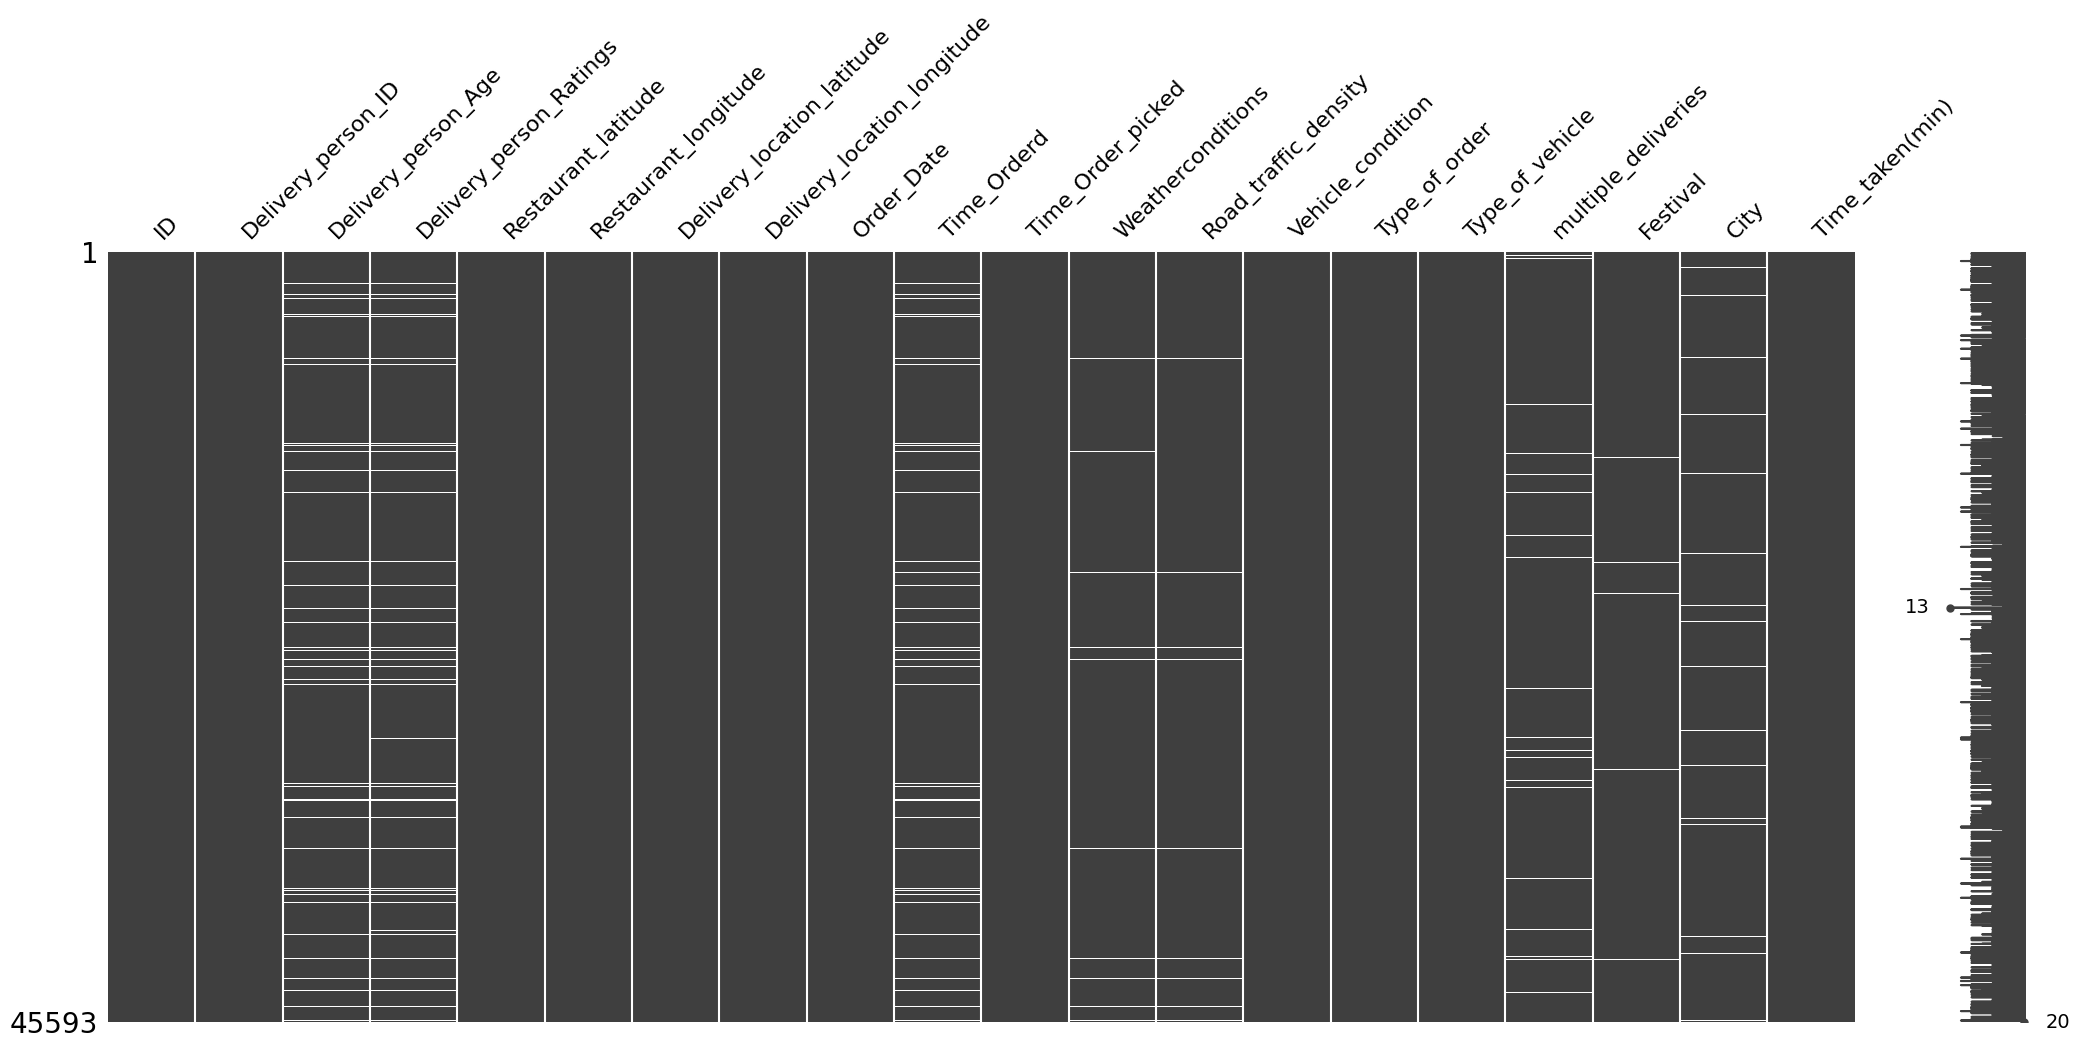

In [209]:
msno.matrix(missing_df)

**Observations**
- it seems `Delivery_person_Age`, `Delivery_person_Ratings` and `Time_Ordered` have similar pattrn for null values and `Weatherconditions` and `Road_traffic_density` are similar.

<Axes: >

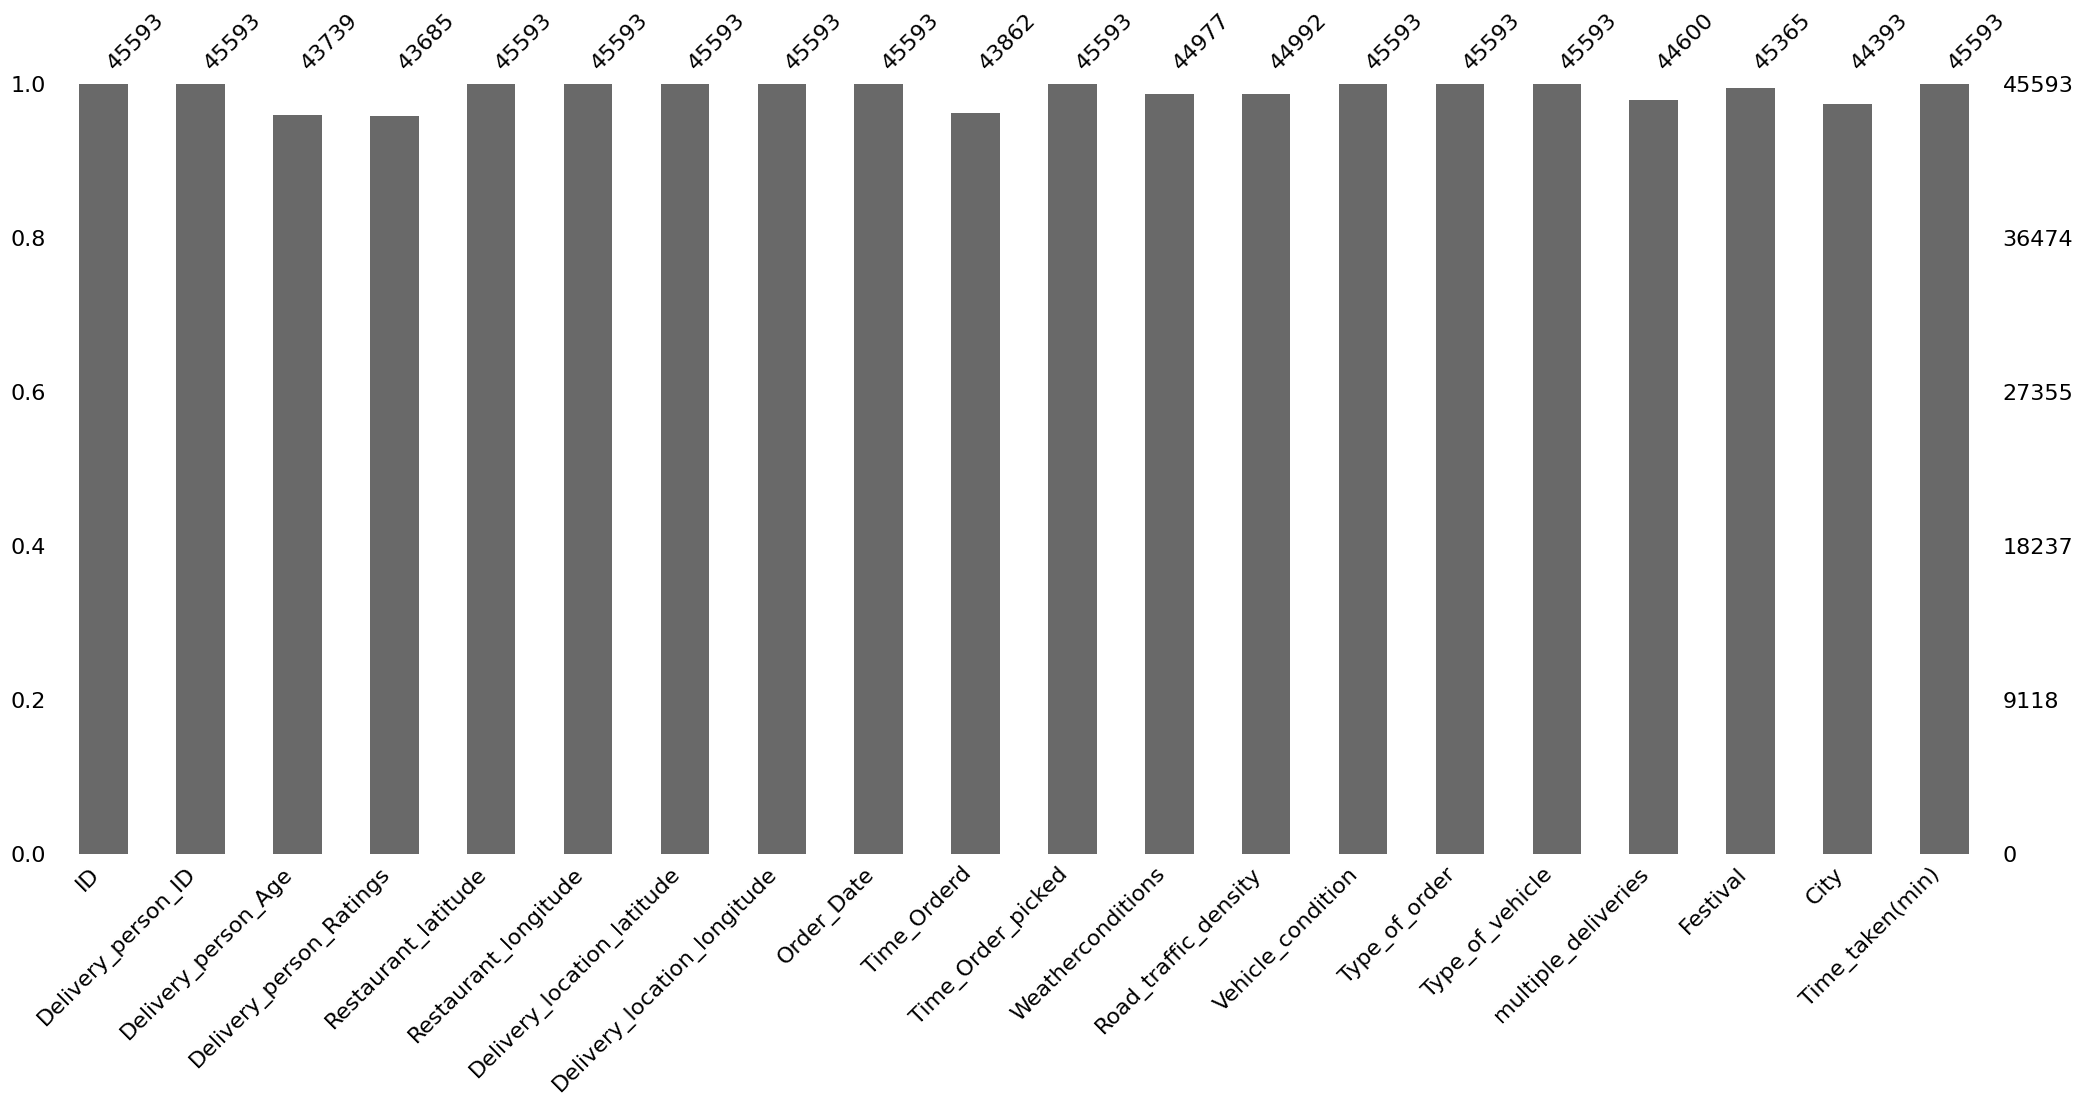

In [210]:
msno.bar(missing_df)

<Axes: >

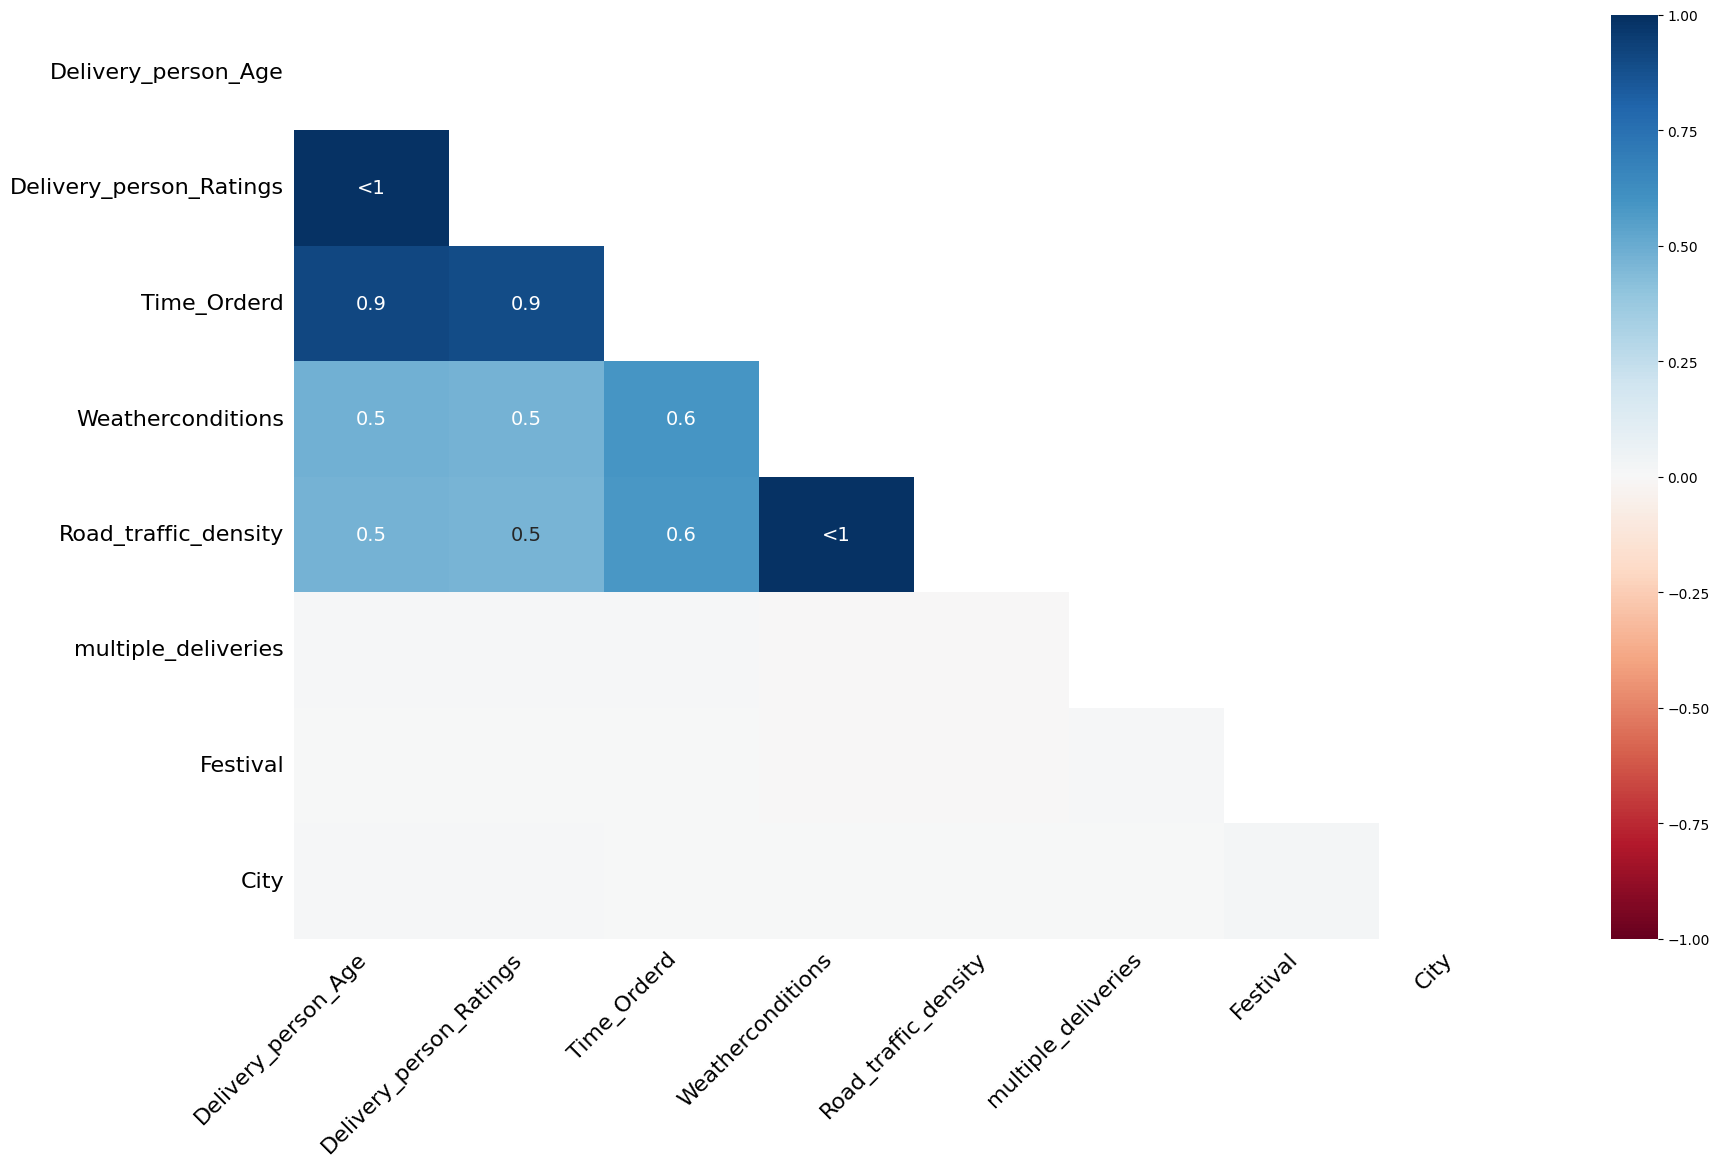

In [211]:
msno.heatmap(missing_df)

In [212]:
missing_df[['Weatherconditions', 'Road_traffic_density']].isna().sum()

Weatherconditions       616
Road_traffic_density    601
dtype: int64

In [213]:
# correlation of missingness between Weatherconditions and Road_traffic_density
(missing_df[['Weatherconditions', 'Road_traffic_density']].isna().all(axis=1).sum())/missing_df[["Weatherconditions","Road_traffic_density"]].isna().sum()

Weatherconditions       0.975649
Road_traffic_density    1.000000
dtype: float64

<Axes: >

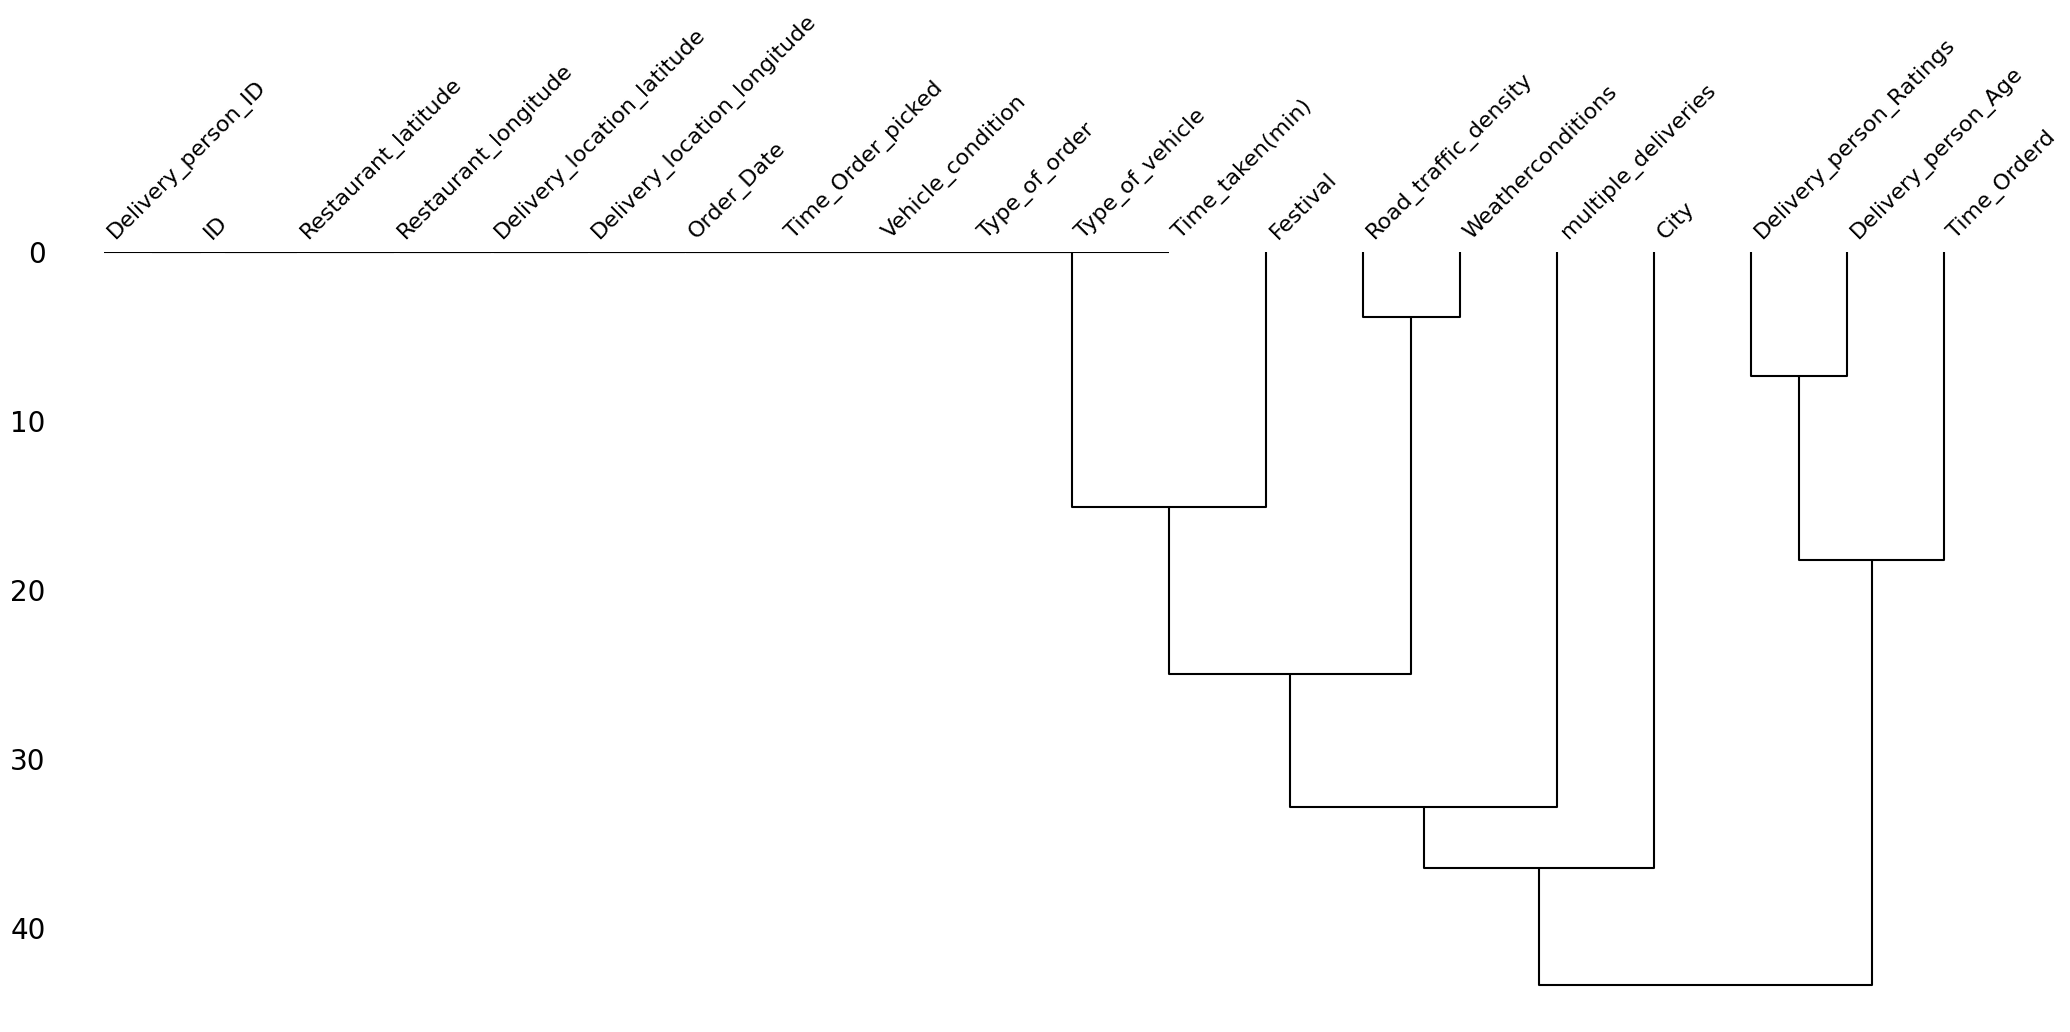

In [214]:
msno.dendrogram(missing_df)

In [215]:
# missing percentage
100*(missing_df.isna().any(axis=1).sum())/missing_df.shape[0]

np.float64(9.266773408198627)

### Data Cleaning

In [216]:
df.columns.to_list()

['ID',
 'Delivery_person_ID',
 'Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weatherconditions',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'Time_taken(min)']

In [217]:
df = (
    df
    .rename(columns=str.lower)
    .rename(columns={
        "delivery_person_id" : "rider_id",
        "delivery_person_age": "age",
        "delivery_person_ratings": "ratings",
        "delivery_location_latitude": "delivery_latitude",
        "delivery_location_longitude": "delivery_longitude",
        "time_orderd": "order_time",
        "time_order_picked": "order_picked_time",
        "weatherconditions": "weather",
        "road_traffic_density": "traffic",
        "city": "city_type",
        "time_taken(min)": "time_taken"
    })
)

In [218]:
df.head()

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [219]:
# check for duplicacy
df.drop(columns=['id']).duplicated().sum()

np.int64(0)

In [220]:
# No of unique ID
df['id'].nunique()

45593

In [221]:
# unique rider_id
df['rider_id'].nunique()

1320

In [222]:
# extract city from rider_id
(
    df['rider_id']
    .str.split('RES')
    .str.get(0)
    .rename('City Name')
)

0          INDO
1          BANG
2          BANG
3         COIMB
4          CHEN
          ...  
45588       JAP
45589       AGR
45590      CHEN
45591     COIMB
45592    RANCHI
Name: City Name, Length: 45593, dtype: object

In [223]:
df['age'].describe()

count     45593
unique       23
top          35
freq       2262
Name: age, dtype: object

In [224]:
df['age'].astype('float').describe()

count    43739.000000
mean        29.567137
std          5.815155
min         15.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: age, dtype: float64

**Observation** - 
minimum age is 15, which is illegal.

<Axes: ylabel='age'>

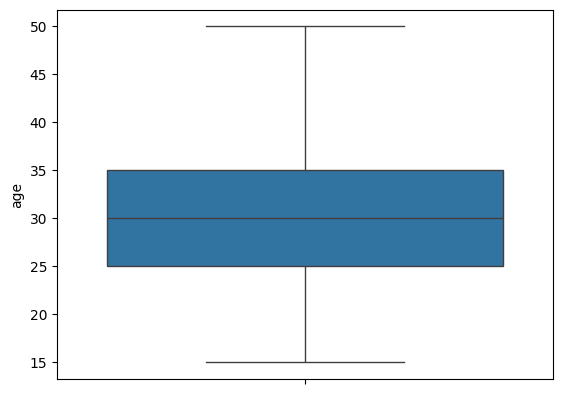

In [225]:
sns.boxplot(df['age'].astype('float'))

<Axes: xlabel='age', ylabel='Density'>

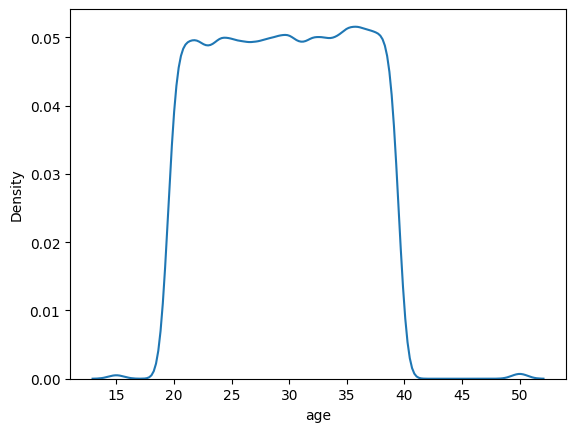

In [226]:
sns.kdeplot(df['age'].astype('float'))

**Observation** - it seems `age` column have kind of uniform distribution.

In [227]:
minors_df = df.loc[df['age'].astype('float') < 18]
minors_df

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
2387,0x564,JAPRES15DEL03,15,1,-26.891191,75.802083,26.981191,75.892083,12-03-2022,NaN,17:20:00,conditions NaN,NaN,3,Meal,motorcycle,0,No,Urban,(min) 15
2905,0xcd0,INDORES010DEL03,15,1,22.750040,75.902847,22.810040,75.962847,03-04-2022,NaN,20:30:00,conditions NaN,NaN,3,Snack,scooter,1,No,Metropolitian,(min) 29
2951,0x91a,SURRES17DEL03,15,1,21.149569,72.772697,21.209569,72.832697,21-03-2022,NaN,22:10:00,conditions NaN,NaN,3,Buffet,bicycle,1,No,Metropolitian,(min) 20
5902,0x474,CHENRES15DEL03,15,1,13.026286,80.275235,13.056286,80.305235,11-03-2022,NaN,20:50:00,conditions NaN,NaN,3,Drinks,bicycle,1,No,Metropolitian,(min) 25
9156,0x73f,BANGRES05DEL01,15,1,12.970324,77.645748,13.080324,77.755748,25-03-2022,NaN,23:25:00,conditions NaN,NaN,3,Buffet,motorcycle,2,No,Metropolitian,(min) 34
10900,0x1b49,MUMRES14DEL02,15,1,19.181300,72.836191,19.231300,72.886191,30-03-2022,NaN,20:55:00,conditions NaN,NaN,3,Buffet,motorcycle,1,No,Metropolitian,(min) 39
11125,0x40b,SURRES12DEL01,15,1,-21.183434,-72.814492,21.193434,72.824492,05-03-2022,NaN,11:30:00,conditions NaN,NaN,3,Meal,scooter,1,No,Urban,(min) 27
12093,0x523,INDORES03DEL02,15,1,22.751857,75.866699,22.801857,75.916699,24-03-2022,NaN,21:15:00,conditions NaN,NaN,3,Buffet,bicycle,0,No,Metropolitian,(min) 28
15124,0x18b0,RANCHIRES02DEL01,15,1,0.000000,0.000000,0.070000,0.070000,16-03-2022,NaN,23:55:00,conditions NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 21
15927,0x550,CHENRES08DEL02,15,1,13.022394,80.242439,13.072394,80.292439,11-03-2022,NaN,18:10:00,conditions NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 17


In [228]:
minors_df.shape

(38, 20)

**Observations**
- there are 38 entries in `age` column below 18 years and all the entries have 15 years age.
- all the entries have similar 1 star rating.
- all the entries in `order_time`, `weather` and `traffic` columns have null values.
- the vehicle condition of all these riders is very bad.
- some values in `latitude` and `longitude` columns are negative, which can not be possible for India.

In [229]:
# Ratings
df['ratings'].astype('float').describe()

count    43685.000000
mean         4.633780
std          0.334716
min          1.000000
25%          4.500000
50%          4.700000
75%          4.900000
max          6.000000
Name: ratings, dtype: float64

<Axes: xlabel='ratings', ylabel='Density'>

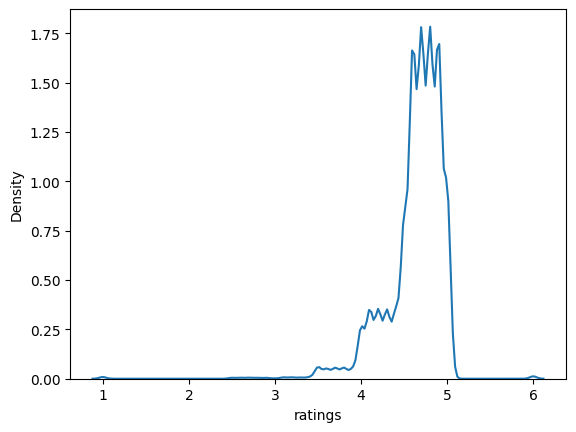

In [230]:
sns.kdeplot(df['ratings'].astype('float'))

<Axes: ylabel='ratings'>

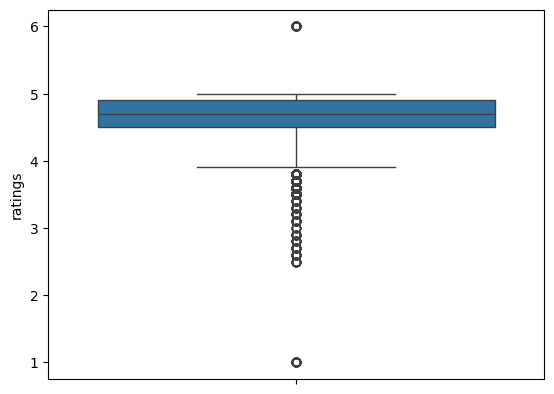

In [231]:
sns.boxplot(df['ratings'].astype('float'))

**Observations**
- minimum value is 1.
- IQR range is between 4.5 to 4.9.
- maximum value is 6, which seems to be an anamoly.

In [232]:
six_star_df = df.loc[df['ratings'].astype('float') == 6]
print(len(six_star_df))
six_star_df

53


,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
3586,0x46d,BANGRES05DEL01,50,6,-12.970324,-77.645748,13.010324,77.685748,13-03-2022,NaN,12:30:00,conditions NaN,NaN,3,Meal,electric_scooter,0,No,Urban,(min) 25
4714,0x493,HYDRES17DEL01,50,6,-17.451976,-78.385883,17.561976,78.495883,04-04-2022,NaN,23:20:00,conditions NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 27
5169,0x4f2,JAPRES08DEL01,50,6,-26.910262,-75.783013,27.020262,75.893013,18-03-2022,NaN,18:50:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20
5362,0x430,BANGRES19DEL01,50,6,12.914264,77.678400,13.024264,77.788400,06-04-2022,NaN,20:55:00,conditions NaN,NaN,3,Meal,electric_scooter,1,No,Metropolitian,(min) 18
5651,0xbef1,AGRRES13DEL02,50,6,-27.159795,-78.042990,27.209795,78.092990,13-02-2022,NaN,18:05:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20
6394,0x427,JAPRES06DEL02,50,6,26.911927,75.797282,27.041927,75.927282,02-04-2022,NaN,22:10:00,conditions NaN,NaN,3,Meal,electric_scooter,0,No,Urban,(min) 20
7031,0x3eb,MYSRES15DEL02,50,6,-12.352058,-76.606650,12.372058,76.626650,15-03-2022,NaN,10:00:00,conditions NaN,NaN,3,Buffet,scooter,1,No,Metropolitian,(min) 14
7681,0xd42,VADRES09DEL01,50,6,0.000000,0.000000,0.010000,0.010000,21-03-2022,NaN,08:35:00,conditions NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 22
9499,0x3f0,BANGRES010DEL01,50,6,12.933298,77.614293,13.003298,77.684293,12-03-2022,NaN,18:25:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Urban,(min) 17
9535,0x3ef,RANCHIRES13DEL01,50,6,-23.374989,-85.335486,23.444989,85.405486,20-03-2022,NaN,17:55:00,conditions NaN,NaN,3,Snack,bicycle,1,No,Metropolitian,(min) 32


**observation** - similar problem that minor data have.

### location columns

In [233]:
location_columns = ['restaurant_latitude', 'restaurant_longitude',	'delivery_latitude',	'delivery_longitude']
loc_subset = df.loc[:,location_columns]
loc_subset

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
0,22.745049,75.892471,22.765049,75.912471
1,12.913041,77.683237,13.043041,77.813237
2,12.914264,77.678400,12.924264,77.688400
3,11.003669,76.976494,11.053669,77.026494
4,12.972793,80.249982,13.012793,80.289982
...,...,...,...,...
45588,26.902328,75.794257,26.912328,75.804257
45589,0.000000,0.000000,0.070000,0.070000
45590,13.022394,80.242439,13.052394,80.272439
45591,11.001753,76.986241,11.041753,77.026241


In [234]:
loc_subset.describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702
std,8.185109,22.883647,7.335122,21.118812
min,-30.905562,-88.366217,0.010000,0.010000
25%,12.933284,73.170000,12.988453,73.280000
50%,18.546947,75.898497,18.633934,76.002574
75%,22.728163,78.044095,22.785049,78.107044
max,30.914057,88.433452,31.054057,88.563452


In [235]:
loc_subset.loc[(loc_subset < 0).any(axis=1)]

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
92,-27.163303,78.057044,27.233303,78.127044
283,-27.165108,78.015053,27.225108,78.075053
289,-18.551440,-73.804855,18.611440,73.864855
425,-30.366322,-78.070453,30.496322,78.200453
534,-12.325461,-76.632278,12.385461,76.692278
...,...,...,...,...
44933,-19.874733,75.353942,19.904733,75.383942
45020,-18.514210,73.838429,18.524210,73.848429
45108,-15.493950,-73.827423,15.563950,73.897423
45182,-26.482581,80.315628,26.532581,80.365628


In [236]:
lower_bound_lat = 6.44
lower_bound_long = 68.70

In [237]:
(
    loc_subset
    .loc[
        lambda x:
        (x['restaurant_latitude'] < lower_bound_lat) |
        (x['restaurant_longitude'] < lower_bound_long) |
        (x['delivery_latitude'] < lower_bound_lat) |
        (x['delivery_longitude'] < lower_bound_long)
    ]
    .sample(50)
)

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
25532,0.000000,0.000000,0.070000,0.070000
24633,0.000000,0.000000,0.070000,0.070000
43566,0.000000,0.000000,0.110000,0.110000
34729,0.000000,0.000000,0.110000,0.110000
27864,0.000000,0.000000,0.080000,0.080000
40529,-26.470000,80.350000,26.520000,80.400000
4709,0.000000,0.000000,0.010000,0.010000
16811,0.000000,0.000000,0.110000,0.110000
12372,0.000000,0.000000,0.050000,0.050000
25562,0.000000,0.000000,0.020000,0.020000


In [238]:
(
    loc_subset
    .loc[
        lambda x:
        (x['restaurant_latitude'] < lower_bound_lat) |
        (x['restaurant_longitude'] < lower_bound_long) |
        (x['delivery_latitude'] < lower_bound_lat) |
        (x['delivery_longitude'] < lower_bound_long)
    ]
    .shape[0]
)

4071

In [239]:
(
    loc_subset
    .loc[
        lambda x:
        (x['restaurant_latitude'] < lower_bound_lat) |
        (x['restaurant_longitude'] < lower_bound_long) |
        (x['delivery_latitude'] < lower_bound_lat) |
        (x['delivery_longitude'] < lower_bound_long)
    ]
    .describe()
)

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,4071.000000,4071.000000,4071.000000,4071.000000
mean,-2.149416,2.068601,2.212538,8.299885
std,6.537913,25.270676,6.538283,23.980011
min,-30.905562,-88.366217,0.010000,0.010000
25%,0.000000,0.000000,0.040000,0.040000
50%,0.000000,0.000000,0.070000,0.070000
75%,0.000000,0.000000,0.110000,0.110000
max,0.000000,88.433452,31.045562,88.523452


**Observations**
- some values in `restaurant_latitude` and `restaurant_longitude` columns is negative, which is not possible. since india lies to the north of equator between 6° 44′ and 35° 30′ north latitude and 68° 7′ and 97° 25′ east longitude. (if we take absolute of those values then it will be fixed)
- many rows has zero values, which is not good.

(array([1, 2, 3, 4]),
 [Text(1, 0, 'restaurant_latitude'),
  Text(2, 0, 'restaurant_longitude'),
  Text(3, 0, 'delivery_latitude'),
  Text(4, 0, 'delivery_longitude')])

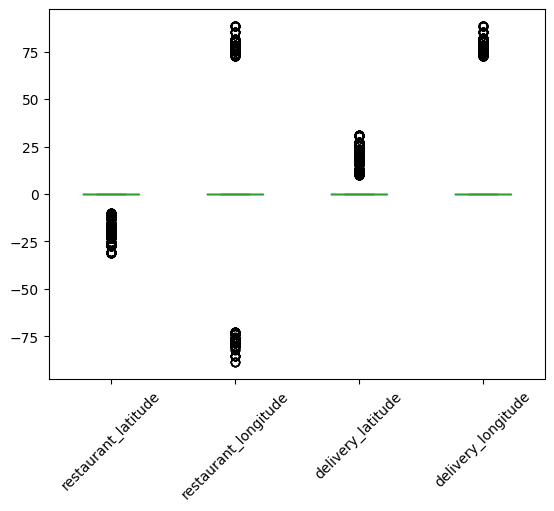

In [240]:
(
    loc_subset
    .loc[
        lambda x:
        (x['restaurant_latitude'] < lower_bound_lat) |
        (x['restaurant_longitude'] < lower_bound_long) |
        (x['delivery_latitude'] < lower_bound_lat) |
        (x['delivery_longitude'] < lower_bound_long)
    ]
    .plot(kind='box')
)
plt.xticks(rotation=45)

(array([1, 2, 3, 4]),
 [Text(1, 0, 'restaurant_latitude'),
  Text(2, 0, 'restaurant_longitude'),
  Text(3, 0, 'delivery_latitude'),
  Text(4, 0, 'delivery_longitude')])

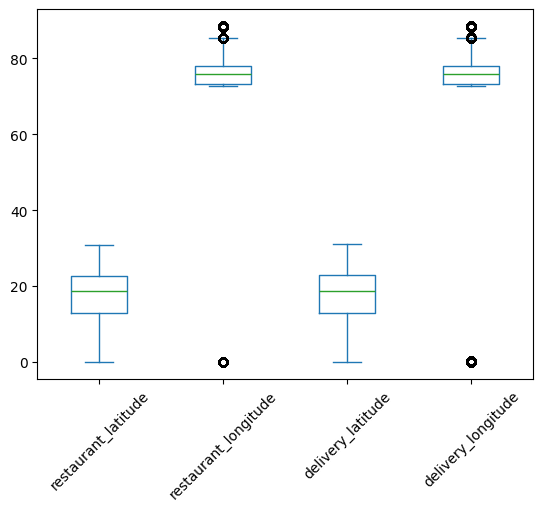

In [241]:
loc_subset.abs().plot(kind='box')
plt.xticks(rotation=45)

In [242]:
(
    loc_subset
    .abs()
    .loc[
        lambda x:
        (x['restaurant_latitude'] < lower_bound_lat) |
        (x['restaurant_longitude'] < lower_bound_long) |
        (x['delivery_latitude'] < lower_bound_lat) |
        (x['delivery_longitude'] < lower_bound_long)
    ]
    .shape
)

(3640, 4)

In [243]:
(
    loc_subset
    .abs()
    .loc[
        lambda x:
        (x['restaurant_latitude'] < 1) |
        (x['restaurant_longitude'] < 1) |
        (x['delivery_latitude'] < 1) |
        (x['delivery_longitude'] < 1)
    ]
    .shape
)

(3640, 4)

**Observations** - now all the errorness values are less than 1 in location columns.

In [244]:
def clean_location_cols(data: pd.DataFrame) -> pd.DataFrame:
    return(
        data
        .assign(
            **{col: (np.where(data[col] < 1, np.nan, data[col].values)) for col in location_columns}
        )
    )

In [245]:
clean_location_cols(df).isna().sum()

id                         0
rider_id                   0
age                        0
ratings                    0
restaurant_latitude     4071
restaurant_longitude    3802
delivery_latitude       3640
delivery_longitude      3640
order_date                 0
order_time                 0
order_picked_time          0
weather                    0
traffic                    0
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries        0
festival                   0
city_type                  0
time_taken                 0
dtype: int64

### Order Date

In [246]:
df['order_date'].nunique()

44

In [247]:
df['order_date'].isna().sum()

np.int64(0)

In [248]:
df['order_date'].unique()

array(['19-03-2022', '25-03-2022', '05-04-2022', '26-03-2022',
       '11-03-2022', '04-03-2022', '14-03-2022', '20-03-2022',
       '12-02-2022', '13-02-2022', '14-02-2022', '02-04-2022',
       '01-03-2022', '16-03-2022', '15-02-2022', '10-03-2022',
       '27-03-2022', '12-03-2022', '01-04-2022', '05-03-2022',
       '11-02-2022', '08-03-2022', '03-04-2022', '30-03-2022',
       '28-03-2022', '18-03-2022', '06-04-2022', '04-04-2022',
       '24-03-2022', '09-03-2022', '02-03-2022', '13-03-2022',
       '29-03-2022', '31-03-2022', '17-03-2022', '07-03-2022',
       '15-03-2022', '16-02-2022', '03-03-2022', '18-02-2022',
       '23-03-2022', '17-02-2022', '06-03-2022', '21-03-2022'],
      dtype=object)

In [249]:
df['order_date']

0        19-03-2022
1        25-03-2022
2        19-03-2022
3        05-04-2022
4        26-03-2022
            ...    
45588    24-03-2022
45589    16-02-2022
45590    11-03-2022
45591    07-03-2022
45592    02-03-2022
Name: order_date, Length: 45593, dtype: object

In [250]:
order_date = pd.to_datetime(df['order_date'], dayfirst=True)
order_date

0       2022-03-19
1       2022-03-25
2       2022-03-19
3       2022-04-05
4       2022-03-26
           ...    
45588   2022-03-24
45589   2022-02-16
45590   2022-03-11
45591   2022-03-07
45592   2022-03-02
Name: order_date, Length: 45593, dtype: datetime64[ns]

In [251]:
order_date.max()-order_date.min()

Timedelta('54 days 00:00:00')

In [252]:
order_date.agg(['min', 'max']).set_axis(['start', 'end'], axis=0)

start   2022-02-11
end     2022-04-06
Name: order_date, dtype: datetime64[ns]

In [253]:
# function to extract day, month, year, day_of_week, is_weekend
def extract_date_features(series: pd.Series) -> pd.DataFrame:
    date_col = pd.to_datetime(series, dayfirst=True)
    return(
        pd.DataFrame(
            {
                "day" : date_col.dt.day,
                "month" : date_col.dt.month,
                "year" : date_col.dt.year,
                "day_of_week" : date_col.dt.day_name(),
                "is_weekend" : date_col.dt.day_name().isin(['Saturday', 'Sunday']).astype('int')
            }
        )
    )

In [254]:
extract_date_features(df['order_date']).sample(25)

,day,month,year,day_of_week,is_weekend
11160,1,4,2022,Friday,0
31930,17,2,2022,Thursday,0
2471,1,4,2022,Friday,0
40304,3,4,2022,Sunday,1
35130,11,2,2022,Friday,0
10785,10,3,2022,Thursday,0
31293,3,4,2022,Sunday,1
8651,18,3,2022,Friday,0
42570,17,3,2022,Thursday,0
21764,17,2,2022,Thursday,0


### Order time and Order picked time

In [255]:
order_time_hr = pd.to_datetime(df['order_time'].replace("NaN ", np.nan), dayfirst=True).dt.hour
order_time_hr

C:\Users\Appsquadz\AppData\Local\Temp\ipykernel_43208\2138979677.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  order_time_hr = pd.to_datetime(df['order_time'].replace("NaN ", np.nan), dayfirst=True).dt.hour


0        11.0
1        19.0
2         8.0
3        18.0
4        13.0
         ... 
45588    11.0
45589    19.0
45590    23.0
45591    13.0
45592    17.0
Name: order_time, Length: 45593, dtype: float64

In [256]:
def time_of_day(series: pd.Series):
    time_col = pd.to_datetime(series, dayfirst=True).dt.hour
    conditions = [
            (time_col.between(6, 12, inclusive='left')),
            (time_col.between(12, 17, inclusive='left')),
            (time_col.between(17, 20, inclusive='left')),
            (time_col.between(20, 24, inclusive='left'))
        ]
    choices = ['morning', 'afternoon', 'evening', 'night']
    return(
        np.select(conditions, choices, default='after_midnight')
    )

In [257]:
time_of_day(df['order_time'].replace('NaN ', np.nan))

C:\Users\Appsquadz\AppData\Local\Temp\ipykernel_43208\1436351364.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_col = pd.to_datetime(series, dayfirst=True).dt.hour


array(['morning', 'evening', 'morning', ..., 'night', 'afternoon',
       'evening'], shape=(45593,), dtype='<U14')

In [258]:
time_subset = df.loc[:,["order_time","order_picked_time"]]
time_subset

,order_time,order_picked_time
0,11:30:00,11:45:00
1,19:45:00,19:50:00
2,08:30:00,08:45:00
3,18:00:00,18:10:00
4,13:30:00,13:45:00
...,...,...
45588,11:35:00,11:45:00
45589,19:55:00,20:10:00
45590,23:50:00,00:05:00
45591,13:35:00,13:40:00


In [259]:
time_subset.dtypes

order_time           object
order_picked_time    object
dtype: object

In [260]:
# calculate the pickup time
(
    time_subset
    .assign(
        **{
            col: (pd.to_datetime(time_subset[col].replace("NaN ", np.nan).dropna(), dayfirst=True))
            for col in time_subset.columns.tolist()
        }
    )
    .assign(
        pickup_time = lambda x: (x['order_picked_time']-x['order_time']).dt.seconds/60,
        order_time_hour = lambda x: (x['order_time']).dt.hour,
        order_time_of_day = lambda x: (x['order_time']).pipe(time_of_day)
    )
    .drop(columns=['order_time', 'order_picked_time'])
)

C:\Users\Appsquadz\AppData\Local\Temp\ipykernel_43208\3436852539.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: (pd.to_datetime(time_subset[col].replace("NaN ", np.nan).dropna(), dayfirst=True))
C:\Users\Appsquadz\AppData\Local\Temp\ipykernel_43208\3436852539.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: (pd.to_datetime(time_subset[col].replace("NaN ", np.nan).dropna(), dayfirst=True))


,pickup_time,order_time_hour,order_time_of_day
0,15.0,11.0,morning
1,5.0,19.0,evening
2,15.0,8.0,morning
3,10.0,18.0,evening
4,15.0,13.0,afternoon
...,...,...,...
45588,10.0,11.0,morning
45589,15.0,19.0,evening
45590,15.0,23.0,night
45591,5.0,13.0,afternoon


### Weather

In [261]:
df['weather'].value_counts()

weather
conditions Fog           7654
conditions Stormy        7586
conditions Cloudy        7536
conditions Sandstorms    7495
conditions Windy         7422
conditions Sunny         7284
conditions NaN            616
Name: count, dtype: int64

In [262]:
(
    df['weather']
    .str.replace('conditions ', '')
    .replace('NaN', np.nan)
    .unique()
)

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', nan],
      dtype=object)

### Traffic

In [263]:
(
    df['traffic']
    .value_counts()
)

traffic
Low        15477
Jam        14143
Medium     10947
High        4425
NaN          601
Name: count, dtype: int64

In [264]:
(
    df['traffic']
    .replace('NaN ', np.nan)
    .unique()
)

array(['High ', 'Jam ', 'Low ', 'Medium ', nan], dtype=object)

### Vehicle condition

In [265]:
(
    df['vehicle_condition']
    .value_counts()
    .sort_index()
)

vehicle_condition
0    15009
1    15030
2    15034
3      520
Name: count, dtype: int64

### Type of order

In [266]:
(
    df['type_of_order']
    .value_counts()
)

type_of_order
Snack      11533
Meal       11458
Drinks     11322
Buffet     11280
Name: count, dtype: int64

### Type of vehicle

In [267]:
(
    df['type_of_vehicle']
    .value_counts()
)

type_of_vehicle
motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: count, dtype: int64

### Data Cleaning and Feature Building

In [ ]:
def data_cleaning(data: pd.DataFrame) -> pd.DataFrame:
    return(
        data
        .drop(columns="id")
        .drop(columns=minors_df.columns.tolist())
        .drop(columns=six_star_df.columns.tolist())
        .replace("NaN ", np.nan)
        .assign(
            # city column from rider id
            city_name = lambda x: x['rider_id'].str.split('RES').str.get(0).str.strip(),
            # change data type of age
            age = lambda x: x['age'].astype('float'),
            # change data type of ratings
            ratings = lambda x: x['ratings'].astype('float'),
            # absolute value in location based columns
            restaurant_latitude = lambda x: x['restaurant_latitude'].abs(),
            restaurant_longitude = lambda x: x['restaurant_longitude'].abs(),
            delivery_latitude = lambda x: x['delivery_latitude'].abs(),
            delivery_longitude = lambda x: x['delivery_longitude'].abs(),
            # date based columns
            order_date = lambda x: pd.to_datetime(x['order_date'], dayfirst=True),
            order_day = lambda x: x['order_date'].dt.day,
            order_month = lambda x: x['order_date'].dt.month,
            order_day_of_week = lambda x: x['order_date'].dt.day_name().str.lower(),
            is_weekend = lambda x: x['order_day_of_week'].isin(['saturday', 'sunday']).astype('int'),
            # time based columns
            order_time = lambda x: pd.to_datetime(x['order_time'], dayfirst=True),
            order_picked_time = lambda x: pd.to_datetime(x['order_picked_time'], dayfirst=True),
            pickup_time_minutes = lambda x: (x['order_picked_time']-x['order_time']).dt.seconds/60,
            order_time_hour = lambda x: x['order_time'].dt.hour,
            order_time_of_day = lambda x: (x['order_time_hour'].pipe(time_of_day)),
            # categorical columns
            weather = lambda x: (x['weather'].str.replace('conditions ', '').str.lower().replace('nan', np.nan)),
            traffic = lambda x: (x['traffic'].str.strip().str.lower()),
            type_of_order = lambda x: x['type_of_order'].str.strip().str.lower(),
            type_of_vehicle = lambda x: x['type_of_vehicle'].str.strip().str.lower(),
            festival = lambda x: x['festival'].str.strip().str.lower(),
            city_type = lambda x: x['city_type'].str.strip().str.lower(),
            multiple_deliveries = lambda x: x['multiple_deliveries'].astype(float),
            time_taken = lambda x: x['time_taken'].str.replace("(min) ", "").astype('int')
        )
        .drop(columns=["order_time","order_picked_time"])
    )

In [293]:
df

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [294]:
data_cleaning(df)

KeyError: "['id'] not found in axis"